# Summer 2022 Data Science Intern Challenge

## Question 1 Analyzes

Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

* a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
* b. What metric would you report for this dataset?
* c. What is its value?



# Candidate Name: Dinnara Hitt

### I wrote a Python program in Jupyter Notebook, using Pandas, Matplotlib, and NumPy libraries to help me analyze the data and answer question 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

#csv file provided
csv_file_path = "2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv"


In [2]:
#Create a pandas dateframe with the csv file
purchase_df = pd.read_csv(csv_file_path)
purchase_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
purchase_df.describe()


,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [4]:
# Sort dataframe by order_amount
purchase_df = purchase_df.sort_values("order_amount", ascending=False)
purchase_df.head(100)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3927,3928,97,979,810,5,credit_card,2017-03-11 7:37:13
2757,2758,66,772,805,5,credit_card,2017-03-14 8:43:29
3438,3439,66,842,805,5,credit_card,2017-03-22 17:58:37
742,743,12,727,804,4,cash,2017-03-14 16:38:01


In [5]:
# Calculating measures of central tendency for order_amount

mean_numpy = np.mean(purchase_df.order_amount)
print(f"The mean(AOV) Order Amount is {mean_numpy}")

median_numpy = np.median(purchase_df.order_amount)
print(f"The median Order Amount is  {median_numpy}")

mode_scipy = sts.mode(purchase_df.order_amount)
print(f"The mode Order Amount is {mode_scipy}")

The mean(AOV) Order Amount is 3145.128
The median Order Amount is  284.0
The mode Order Amount is ModeResult(mode=array([153]), count=array([87]))


### Conclusion:
### Answer for question 1a.
* AOV is the same as the mean value. 
* Because the mean(AOV) is way off compared to the median and mode  
* I decided to investigate further.


### Histogram for Order Amount

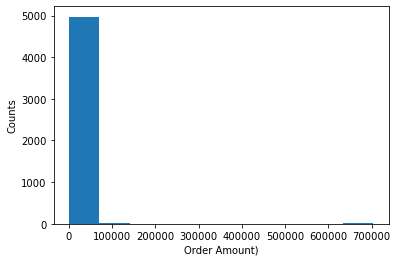

In [6]:
plt.hist(purchase_df.order_amount)
plt.xlabel('Order Amount)')
plt.ylabel('Counts')
plt.show()


### Box Plot for Order Amount

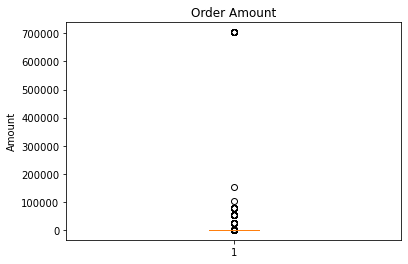

In [7]:
plt.title('Order Amount')
plt.ylabel('Amount')
plt.boxplot(purchase_df.order_amount)
plt.show()

### Conclusion:
* The box plot shows that there is a lot of outliers for order_amount.
* Because of that, I decided to add a new column that calculates the price per item.

In [8]:
# Add a column price_item to dataframe that is oder_amount / total_items
purchase_df["price_item"] = purchase_df['order_amount'] / purchase_df['total_items']
purchase_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_item
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0


### Box Plot for Price Item

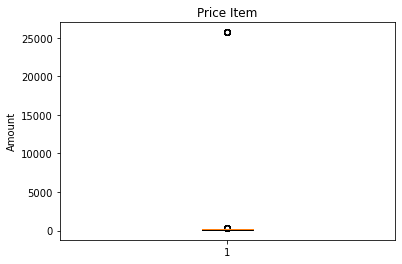

In [9]:
plt.title('Price Item')
plt.ylabel('Amount')
plt.boxplot(purchase_df.price_item)
plt.show()

### Conclusion: 
. The Box Plot for the new column price_item shows that there are some outliers. I am going to remove the outliers.


In [10]:
# Sort dataframe by order_amount
purchase_df = purchase_df.sort_values("price_item", ascending=False)
purchase_df.head(100)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_item
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25,25725.0
3085,3086,78,910,25725,1,cash,2017-03-26 1:59:27,25725.0
4412,4413,78,756,51450,2,debit,2017-03-02 4:13:39,25725.0
3167,3168,78,927,51450,2,cash,2017-03-12 12:23:08,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
...,...,...,...,...,...,...,...,...
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00,352.0
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
1049,1050,12,708,402,2,debit,2017-03-01 1:11:03,201.0
3060,3061,12,990,402,2,debit,2017-03-22 23:52:30,201.0


In [11]:
# Create a new dataframe, keeping only data with priceitem < 500
good_purchase_df = purchase_df.loc[purchase_df["price_item"] < 500]
good_purchase_df.head()


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_item
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0
1929,1930,42,770,352,1,credit_card,2017-03-17 8:11:13,352.0
979,980,42,744,352,1,debit,2017-03-12 13:09:04,352.0
2018,2019,42,739,352,1,debit,2017-03-01 12:42:26,352.0
4625,4626,42,809,352,1,credit_card,2017-03-11 8:21:26,352.0


In [12]:
good_purchase_df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_item
4474,4475,92,820,180,2,credit_card,2017-03-24 12:56:45,90.0
1927,1928,92,960,270,3,debit,2017-03-21 3:44:08,90.0
1084,1085,92,852,180,2,cash,2017-03-24 13:44:57,90.0
335,336,92,853,180,2,cash,2017-03-27 12:53:28,90.0
2092,2093,92,986,90,1,debit,2017-03-04 6:44:05,90.0


In [13]:
good_purchase_df.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_item
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029,152.475575
std,1444.498907,29.014845,87.846007,41155.996469,116.857286,31.260218
min,1.000000,1.000000,607.000000,90.000000,1.000000,90.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000,352.000000


* You can see above that we deleted 46 rows

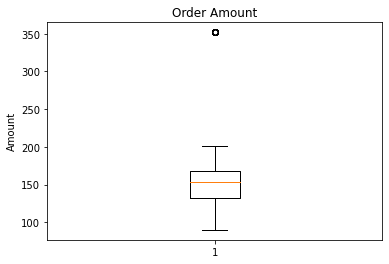

In [14]:
plt.title('Order Amount')
plt.ylabel('Amount')
plt.boxplot(good_purchase_df.price_item)
plt.show()

In [15]:
# Calculating measures of central tendency for order_amount

mean_numpy = np.mean(good_purchase_df.order_amount)
print(f"The mean(AOV) Order Amount is {mean_numpy}")

median_numpy = np.median(good_purchase_df.order_amount)
print(f"The median Order Amount is  {median_numpy}")

mode_scipy = sts.mode(good_purchase_df.order_amount)
print(f"The mode Order Amount is {mode_scipy}")

The mean(AOV) Order Amount is 2717.3677836092047
The median Order Amount is  284.0
The mode Order Amount is ModeResult(mode=array([153]), count=array([87]))


### Conclusion: 
* The AOV went down to 2717.37. 
* But the box plot above shows us that there are still some outliers.
* Let's remove the outliers with a Price of around $350.00

In [16]:
#Create a another dataframe, keeping only data with priceitem < 300
second_purchase_df = good_purchase_df.loc[good_purchase_df["price_item"] < 300]
second_purchase_df.head()


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_item
1049,1050,12,708,402,2,debit,2017-03-01 1:11:03,201.0
3060,3061,12,990,402,2,debit,2017-03-22 23:52:30,201.0
2258,2259,12,734,402,2,credit_card,2017-03-19 8:14:41,201.0
1206,1207,12,721,402,2,debit,2017-03-19 13:15:17,201.0
3571,3572,12,930,402,2,cash,2017-03-22 2:02:32,201.0


In [17]:
second_purchase_df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_item
4474,4475,92,820,180,2,credit_card,2017-03-24 12:56:45,90.0
1927,1928,92,960,270,3,debit,2017-03-21 3:44:08,90.0
1084,1085,92,852,180,2,cash,2017-03-24 13:44:57,90.0
335,336,92,853,180,2,cash,2017-03-27 12:53:28,90.0
2092,2093,92,986,90,1,debit,2017-03-04 6:44:05,90.0


In [18]:
second_purchase_df.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_item
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


* You can see above that we deleted 97 rows total.
* Count = 4903 

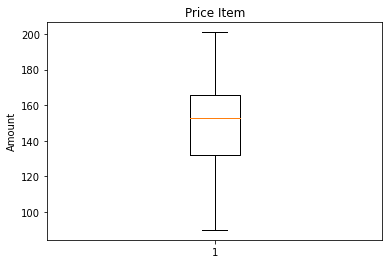

In [19]:
plt.title('Price Item')
plt.ylabel('Amount')
plt.boxplot(second_purchase_df.price_item)
plt.show()

In [20]:
# Calculating measures of central tendency for order_amount

mean_numpy = np.mean(second_purchase_df.order_amount)
print(f"The mean(AOV) Order Amount is {mean_numpy}")

median_numpy = np.median(second_purchase_df.order_amount)
print(f"The median Order Amount is  {median_numpy}")

mode_scipy = sts.mode(second_purchase_df.order_amount)
print(f"The mode Order Amount is {mode_scipy}")

The mean(AOV) Order Amount is 300.1558229655313
The median Order Amount is  284.0
The mode Order Amount is ModeResult(mode=array([153]), count=array([87]))


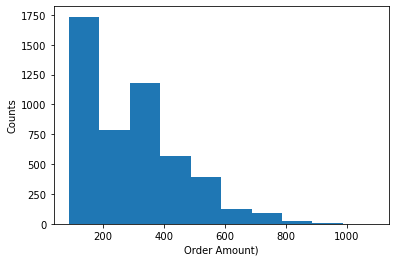

In [21]:
# Histogram
plt.hist(second_purchase_df.order_amount)
plt.xlabel('Order Amount)')
plt.ylabel('Counts')
plt.show()


### Conclusion:
* After removing all outliers the mean value (what we traditionally call Average Order Value) is 300.15
* the Median( the middle value of all orders) value stayed the same throughout this process showing 284.00
* The mode (the most frequently occurring order value) value is 153.00


### Final Conclusion:
* It is a good idea to use the measures of central tendency to investigate the data.
* With an AOV value so high when compared to median and mode. We could see that there was something "wrong" with the data
* After removing all the Outliers the AOV made more sense.
* If we decided not to remove the outliers the median value would be the one that made more sense to use.

### Answer for question 1b. and 1c.
* Not removing the outliers -  I would have used the median Order Amount of  284.0
* Removing the outliers -  I think it is safe to use the mean(AOV) Order Amount of 300.15